# Machine Learning Project - Group 35

Netanel Shahsa , Barel Lanciano , Yonatan Leitner

In [1]:
# Import libraries : 
import pandas as pd
import matplotlib.pyplot as plt #Visualization package.
import seaborn as sns
import numpy as np
#import missingno as msno
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, datasets

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.model_selection import cross_val_score, ShuffleSplit
from scipy import interpolate
from scipy.interpolate import interp1d
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize

In [2]:
total_train = pd.read_csv('C:\\Users\\netanel\\Desktop\\train.csv')

#  Part A - Data Exploration
We would like to explore our data, find out how its behaving and what type of information we can mine throw the diffrent column 

In [3]:
total_train.shape

(21931, 22)

In [4]:
total_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,1.0,a,-1d,0.828866,216.0,4.846091,K,50.0,0,161.714226,...,n,2.0,414.0,0.0,S,2.191401,a8,NaN,15.921017,1
1,8.0,a,-1d,8.981168,46.0,7.324911,A,270.0,0,328.559850,...,n,3.0,63.0,0.0,M,3.811778,a8,NaN,47.567140,0
2,1.0,a,-1d,1.458061,3304.0,7.548887,D,200.0,1,298.775554,...,n,1.0,218.0,0.0,M,4.284457,a4,NaN,10.522228,0
3,1.0,b,-1d,2.753682,212.0,8.200746,E,170.0,0,285.342907,...,y,2.0,NaN,0.0,D,4.680751,a7,NaN,21.185050,0
4,1.0,unknown,-1d,4.496872,1050.0,5.071094,B,260.0,1,328.464688,...,n,3.0,293.0,0.0,S,2.740114,a5,NaN,47.491164,0


In [5]:
total_train.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
21926,1.0,unknown,-1d,9.234068,228.0,6.497949,G,200.0,1,298.387445,...,n,2.0,257.0,0.0,S,3.036520,a5,NaN,23.647446,0
21927,3.0,a,202d,1.425130,829.0,4.459834,K,270.0,0,330.998210,...,n,0.0,196.0,0.0,S,2.108740,a1,B,17.079316,1
21928,1.0,a,-1d,7.656161,296.0,6.688392,A,80.0,1,210.458322,...,n,3.0,NaN,0.0,M,4.083415,a5,NaN,26.412485,0
21929,2.0,unknown,-1d,4.016924,57.0,5.486059,B,90.0,1,220.485053,...,n,2.0,404.0,0.0,S,2.587831,a5,NaN,-2.056748,0
21930,1.0,a,-1d,1.026590,54.0,6.392427,G,100.0,1,231.026258,...,n,2.0,NaN,0.0,M,3.535312,a7,NaN,44.396488,0


we can see that our data is mainly integer type although in some areas we can notice that its string in multi variant form

In [6]:
total_train.dtypes

0        float64
1         object
2         object
3        float64
4        float64
5        float64
6         object
7        float64
8          int64
9        float64
10       float64
11       float64
12        object
13       float64
14       float64
15       float64
16        object
17       float64
18        object
19        object
20       float64
label      int64
dtype: object

In [7]:
total_train[0:-2].describe()

,0,3,4,5,7,8,9,10,11,13,14,15,17,20,label
count,21856.000000,21824.000000,21904.000000,21869.000000,21909.000000,21929.000000,21890.000000,21826.000000,21858.000000,21889.000000,17945.000000,21830.000000,21828.000000,21928.000000,21929.000000
mean,2.709553,4.204270,1383.377831,6.589995,157.456296,0.542387,256.620494,0.608220,268.833568,2.063822,276.014879,0.017316,3.648025,26.279353,0.178440
std,2.976490,3.752897,3030.199398,0.921675,83.123296,0.498211,71.638059,1.893147,183.956108,0.784240,274.581411,0.130448,0.746277,20.110854,0.382891
min,1.000000,-11.138786,-8019.000000,3.776680,10.000000,0.000000,-1.892158,0.000000,0.003898,0.000000,0.000000,0.000000,1.939095,-54.438941,0.000000
25%,1.000000,1.605676,80.000000,5.901414,80.000000,0.000000,209.751756,0.000000,119.314177,2.000000,108.000000,0.000000,3.036520,12.680446,0.000000
50%,2.000000,4.191035,470.000000,6.517201,160.000000,1.000000,277.790810,0.000000,242.057624,2.000000,191.000000,0.000000,3.535312,26.477637,0.000000
75%,3.000000,6.811616,1473.000000,7.246245,210.000000,1.000000,306.592449,0.000000,388.786445,3.000000,342.000000,0.000000,4.150667,39.944291,0.000000
max,51.000000,17.647593,102127.000000,10.303540,310.000000,1.000000,347.191571,41.000000,1081.031042,3.000000,4918.000000,1.000000,7.141043,102.590418,1.000000


we cam spot that column 19 has high percent of missing value. we will adress it in the next step.

In [8]:
total_missing_cheack = total_train.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (total_train.isnull().sum()/total_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_cheack, percent_of_missing_data], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
19,17681,0.806210
14,3985,0.181706
6,145,0.006612
3,105,0.004788
10,103,0.004697
17,101,0.004605
15,99,0.004514
1,89,0.004058
18,84,0.003830
0,73,0.003329


In [9]:
print("sum      colum name")
total_train.isnull().sum()

sum      colum name


0           73
1           89
2           56
3          105
4           25
5           60
6          145
7           20
8            0
9           39
10         103
11          71
12          13
13          40
14        3985
15          99
16          10
17         101
18          84
19       17681
20           1
label        0
dtype: int64

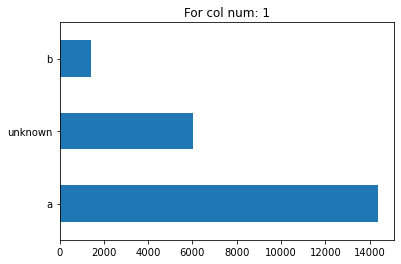

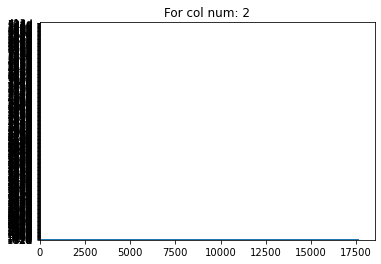

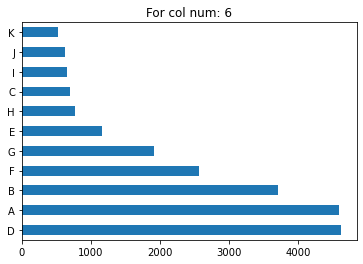

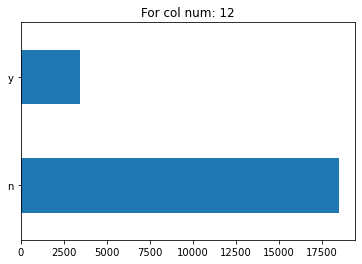

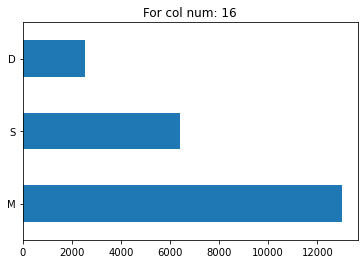

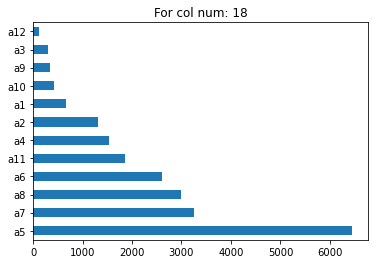

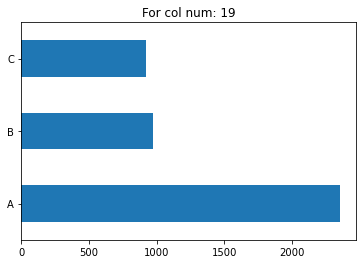

In [10]:
for col in total_train.loc[:, total_train.dtypes == np.object].columns.tolist():  #find all columns how are non-numeric
    total_train[col].value_counts().plot.barh()
    plt.title("For col num: %s" %col)
    plt.show()

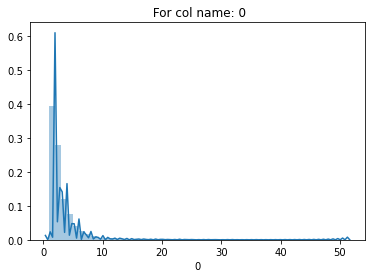

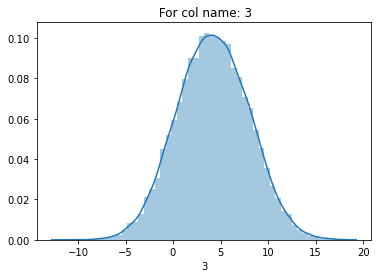

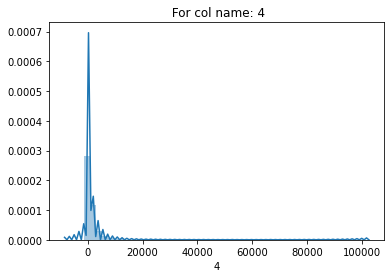

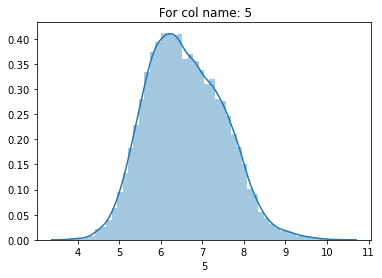

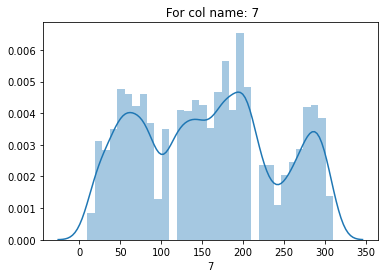

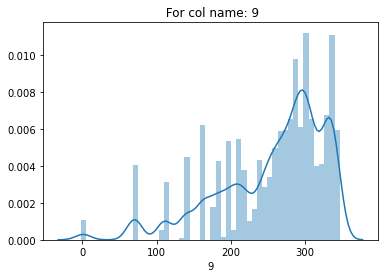

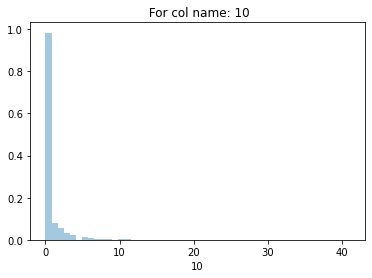

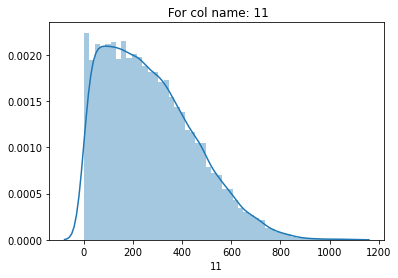

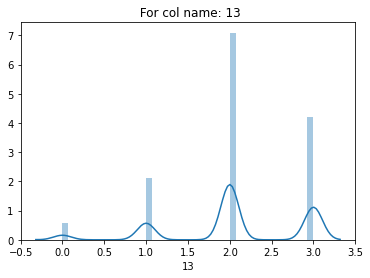

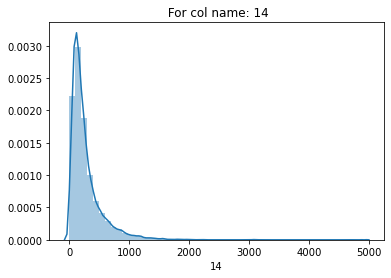

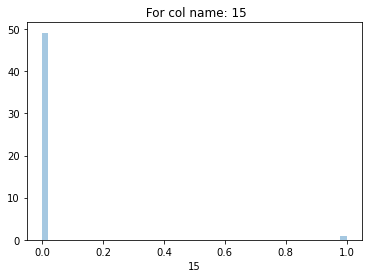

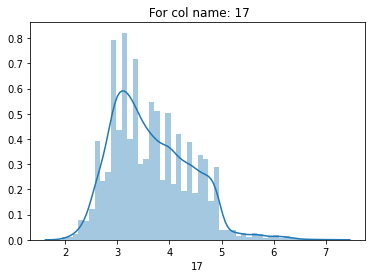

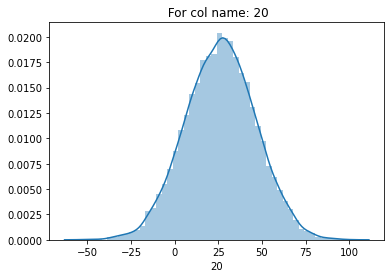

In [11]:
for col in total_train.loc[:, total_train.dtypes == np.float64].columns.tolist():  #find all columns how are non-numeric
    plt.figure(col)
    plt.title(" For col name: %s" %col)
    sns.distplot(total_train[col])

we can spot that there our few columns with high correlation factor , like 7' and 9'

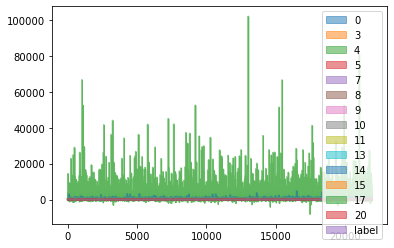

In [12]:
total_train[0:-1].plot.area(stacked=False);

In [13]:
total_train.corr()

,0,3,4,5,7,8,9,10,11,13,14,15,17,20,label
0,1.000000,0.090564,-0.016967,0.009964,0.148854,-0.016146,0.125903,-0.040795,0.067913,-0.004287,-0.088212,0.021060,0.013737,0.009342,-0.088982
3,0.090564,1.000000,0.008787,-0.005487,0.595225,-0.010804,0.559471,-0.036505,0.235581,0.020109,-0.006195,0.007360,-0.009694,-0.003220,-0.015600
4,-0.016967,0.008787,1.000000,0.079775,0.010736,-0.070730,0.012900,0.023810,-0.016112,0.066848,0.019207,-0.065642,0.089116,0.004001,0.062469
5,0.009964,-0.005487,0.079775,1.000000,-0.011275,-0.158702,-0.009352,0.002224,-0.012126,-0.156433,-0.002931,-0.021401,0.900337,0.033696,0.011840
7,0.148854,0.595225,0.010736,-0.011275,1.000000,-0.027526,0.934719,-0.057871,0.408754,0.020601,-0.015932,0.002894,-0.012857,-0.000478,-0.029494
8,-0.016146,-0.010804,-0.070730,-0.158702,-0.027526,1.000000,0.004297,0.033749,-0.017673,-0.047802,-0.001613,-0.001384,-0.183501,-0.011306,-0.165548
9,0.125903,0.559471,0.012900,-0.009352,0.934719,0.004297,1.000000,-0.049853,0.346862,0.007414,-0.007818,0.000099,-0.011786,-0.002989,-0.043236
10,-0.040795,-0.036505,0.023810,0.002224,-0.057871,0.033749,-0.049853,1.000000,-0.026031,0.035655,0.000129,-0.024436,0.002636,-0.005110,0.132873
11,0.067913,0.235581,-0.016112,-0.012126,0.408754,-0.017673,0.346862,-0.026031,1.000000,0.007226,-0.012364,0.007591,-0.011609,-0.001808,0.002174
13,-0.004287,0.020109,0.066848,-0.156433,0.020601,-0.047802,0.007414,0.035655,0.007226,1.000000,-0.002458,-0.015145,-0.173396,-0.003954,0.065719


we can spot that there is correlation between serval colounms , we will adress it in the next chapter

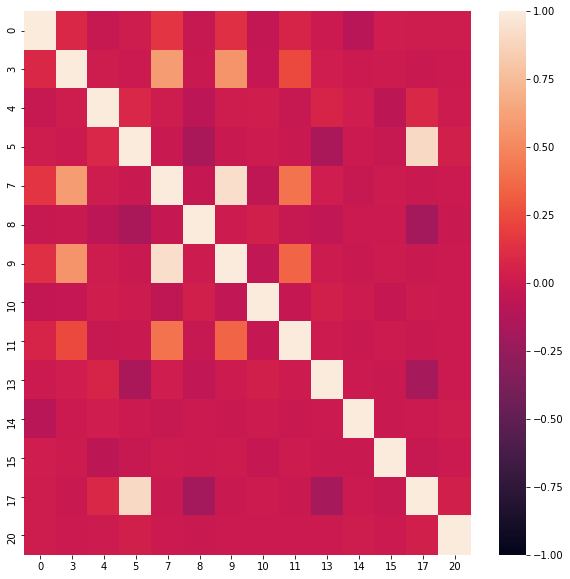

In [14]:
total_train_without_label = total_train.drop(["label"], 1)
figer, size = plt.subplots(figsize=(10,10))
sns.heatmap(total_train_without_label.corr(),vmin=-1.0)

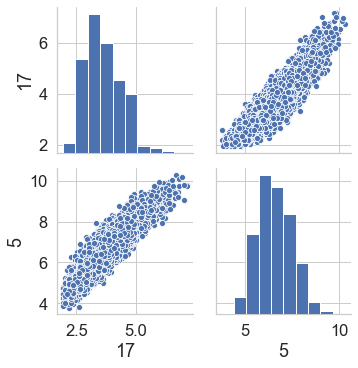

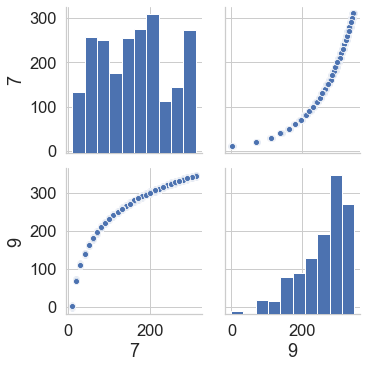

In [15]:
sns.set(style="whitegrid", font_scale=1.5)
cor_17_5 = ["17","5"]
cor_7_9 = ["7","9"]
sns.pairplot(total_train_without_label[cor_17_5], size = 2.5)
sns.pairplot(total_train_without_label[cor_7_9], size = 2.5)
plt.show()

#  Part B - Pre Processing

Now , we prepare our data for the models in the next chapter

In [16]:
def unreadable_values(d_frame): #change the unreadable fields , and drop colounm 19 as it over 85% missing values rate.
    d_frame = d_frame.replace({'?' : None})
    d_frame["1"].replace({"unknown": None}, inplace=True)
    d_frame['2'] = d_frame['2'].str.replace(r'\D', '').astype(float)
    d_frame.drop(['19'], axis=1, inplace=True)

    return d_frame

In [17]:
total_train = unreadable_values(total_train)

In [18]:
def drop_un_relevant_columns(d_frame): #we decided to drop all the following colounms , as we found high correlation ratio with other colounms that stayed in our data
    d_frame.drop(['17'], axis=1, inplace=True)
    d_frame.drop(['9'], axis=1, inplace=True)
    d_frame.drop(['15'], axis=1, inplace=True)
    
    return d_frame

In [19]:
def outlier_removal(d_frame): #appley the outlier removal on all numeric coloumns
        numeric_list = ['0','2','3','4','5','7','10','11','20']
        for num in numeric_list:
            d_frame = d_frame[(np.abs(stats.zscore(d_frame[num], nan_policy='omit')) < 3)]
        
        return d_frame

In [20]:
total_train = drop_un_relevant_columns(total_train)

In [21]:
total_train = outlier_removal(total_train)
total_train.shape

(19281, 18)

 #applying standard scaller , as we found it most sutibale for our data , relative to min-max methood that requierd borders

In [22]:
def scailing_X(d_frame):
    scaler = StandardScaler()
    d_frame[['0','2','3','4','5','7','10','11','14','20']] = scaler.fit_transform(d_frame[['0','2','3','4','5','7','10','11','14','20']])
    return d_frame

In [23]:
total_train = scailing_X(total_train)

In [24]:
total_train.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,16,18,20,label
0,-0.761303,a,-0.378136,-0.897743,-0.516154,-1.911245,K,-1.283641,0,-0.361661,-1.002139,n,2.0,0.485745,S,a8,-0.522940,1
1,3.031779,a,-0.378136,1.294911,-0.614613,0.817074,A,1.364513,0,-0.361661,0.159352,n,3.0,-0.781398,M,a8,1.076181,0
2,-0.761303,a,-0.378136,-0.728514,1.272334,1.063594,D,0.521918,1,-0.361661,0.287774,n,1.0,-0.221834,M,a4,-0.795748,0
3,-0.761303,b,-0.378136,-0.380042,-0.518471,1.781065,E,0.160806,0,-0.361661,-0.468642,y,2.0,NaN,D,a7,-0.256941,0
4,-0.761303,None,-0.378136,0.088809,-0.033123,-1.663596,B,1.244142,1,-0.361661,1.047531,n,3.0,0.048923,S,a5,1.072342,0


In [25]:
def fill_average_info(d_frame): #fill average number in each non binary colounms

    colum_3 = d_frame["3"]
    colum_3_mean = colum_3.mean()
    colum_3.fillna(colum_3_mean , inplace = True)

    colum_4 = d_frame["4"]
    colum_4_mean = colum_4.mean()
    colum_4.fillna(colum_4_mean , inplace = True)

    colum_5 = d_frame["5"]
    colum_5_mean = colum_5.mean()
    colum_5.fillna(colum_5_mean , inplace = True)

    colum_11 = d_frame["11"]
    colum_11_mean = colum_11.mean()
    colum_11.fillna(colum_11_mean , inplace = True)
    
    colum_20 = d_frame["20"]
    colum_20_mean = colum_20.mean()
    colum_20.fillna(colum_20_mean , inplace = True)
    
    colum_14 = d_frame["14"]
    colum_14_mean = int(colum_14.mean())
    colum_14.fillna(colum_14_mean , inplace = True)
    
    colum_0 = d_frame["0"]
    colum_0_mean = int(colum_0.mean())
    colum_0.fillna(colum_0_mean , inplace = True)

    colum_7 = d_frame["7"]
    colum_7_mean = int(colum_7.mean())
    colum_7.fillna(colum_7_mean , inplace = True)
    
    return d_frame
    

In [26]:
def fill_in_common_values(d_frame): #for each binary coloumn , fill hightes probebility char

    colum_12 = d_frame["12"]
    colum_12.fillna('n' , inplace = True)

    colum_16 = d_frame["16"]
    colum_16.fillna('M' , inplace = True)

    colum_18 = d_frame["18"]
    colum_18.fillna('a5' , inplace = True)
    
    colum_1 = d_frame["1"]
    colum_1.fillna('a' , inplace = True)

    colum_2 = d_frame["2"]
    colum_2.fillna(1 , inplace = True)

    colum_10 = d_frame["10"]
    colum_10.fillna(0 , inplace = True)

    colum_13 = d_frame["13"]
    colum_13.fillna(2 , inplace = True)

    colum_6 = d_frame["6"]
    colum_6.fillna('D' , inplace = True)
    
    return d_frame

In [27]:
total_train = fill_average_info(total_train)

In [28]:
total_train = fill_in_common_values(total_train)

In [29]:
print("sum      colum name")
total_train.isnull().sum()

sum      colum name


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
10       0
11       0
12       0
13       0
14       0
16       0
18       0
20       0
label    0
dtype: int64

In [30]:
total_train.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,16,18,20,label
0,-0.761303,a,-0.378136,-0.897743,-0.516154,-1.911245,K,-1.283641,0,-0.361661,-1.002139,n,2.0,0.485745,S,a8,-0.522940,1
1,3.031779,a,-0.378136,1.294911,-0.614613,0.817074,A,1.364513,0,-0.361661,0.159352,n,3.0,-0.781398,M,a8,1.076181,0
2,-0.761303,a,-0.378136,-0.728514,1.272334,1.063594,D,0.521918,1,-0.361661,0.287774,n,1.0,-0.221834,M,a4,-0.795748,0
3,-0.761303,b,-0.378136,-0.380042,-0.518471,1.781065,E,0.160806,0,-0.361661,-0.468642,y,2.0,0.000000,D,a7,-0.256941,0
4,-0.761303,a,-0.378136,0.088809,-0.033123,-1.663596,B,1.244142,1,-0.361661,1.047531,n,3.0,0.048923,S,a5,1.072342,0


In [31]:
total_train.dtypes

0        float64
1         object
2        float64
3        float64
4        float64
5        float64
6         object
7        float64
8          int64
10       float64
11       float64
12        object
13       float64
14       float64
16        object
18        object
20       float64
label      int64
dtype: object

We tried to split our data into 2 main df , for binary and non binary coloumns. we decided at last to keep it together.

In [32]:
'''def create_copys(d_frame):

    non_binary_df = d_frame.copy(deep=True)
    non_binary_df = non_binary_df.drop(["label","1","6","8","12","13","16","18"],axis = 1)

    
    binary_df = d_frame.copy(deep=True)
    binary_df = binary_df.drop(["label","0","2","3","4","5","7","11","14","20"],axis = 1)
    
    lable = d_frame.copy(deep=True)
    lable = lable.drop(["0","1","2","3","4","5","6","8","7","8","10","11","12","13","14","16","18","20"],axis = 1)
    
    return non_binary_df,binary_df,lable''' 

'def create_copys(d_frame):\n\n    non_binary_df = d_frame.copy(deep=True)\n    non_binary_df = non_binary_df.drop(["label","1","6","8","12","13","16","18"],axis = 1)\n\n    \n    binary_df = d_frame.copy(deep=True)\n    binary_df = binary_df.drop(["label","0","2","3","4","5","7","11","14","20"],axis = 1)\n    \n    lable = d_frame.copy(deep=True)\n    lable = lable.drop(["0","1","2","3","4","5","6","8","7","8","10","11","12","13","14","16","18","20"],axis = 1)\n    \n    return non_binary_df,binary_df,lable'

In [33]:
'''train_non_binary , train_binary ,lable_only = create_copys(total_train)''' 

'train_non_binary , train_binary ,lable_only = create_copys(total_train)'

In [34]:
train_non_binary.shape

NameError: name 'train_non_binary' is not defined

now we will handle each categorcial features , by spiliting them with "one hot encoding" for the multi variant columns , and for 0 and 1 for the binary ones

In [35]:
def binary_columns_transform(d_frame):

    d_frame["1"].replace({"a": 1 , "b": 0}, inplace=True)
    d_frame["12"].replace({"n": 1 , "y": 0}, inplace=True)
    return d_frame

In [36]:
def multi_varient_columns(d_frame): #one hot encoding

    row_6 = pd.get_dummies(d_frame['6'],prefix = "6")
    row_10 = pd.get_dummies(d_frame['10'],prefix = "10")
    row_13 = pd.get_dummies(d_frame['13'],prefix = "13")
    row_16 = pd.get_dummies(d_frame['16'],prefix = "16")
    row_18 = pd.get_dummies(d_frame['18'],prefix = "18")

    frames = [d_frame,row_6,row_10,row_16,row_18]
    d_frame = pd.concat(frames , axis = 1)

    d_frame = d_frame.drop(columns = ['6','10','13','16','18'])

    return d_frame

In [37]:
total_train = binary_columns_transform(total_train)

In [38]:
total_train = multi_varient_columns(total_train)

In [39]:
total_train.head()

,0,1,2,3,4,5,7,8,11,12,...,18_a11,18_a12,18_a2,18_a3,18_a4,18_a5,18_a6,18_a7,18_a8,18_a9
0,-0.761303,1,-0.378136,-0.897743,-0.516154,-1.911245,-1.283641,0,-1.002139,1,...,0,0,0,0,0,0,0,0,1,0
1,3.031779,1,-0.378136,1.294911,-0.614613,0.817074,1.364513,0,0.159352,1,...,0,0,0,0,0,0,0,0,1,0
2,-0.761303,1,-0.378136,-0.728514,1.272334,1.063594,0.521918,1,0.287774,1,...,0,0,0,0,1,0,0,0,0,0
3,-0.761303,0,-0.378136,-0.380042,-0.518471,1.781065,0.160806,0,-0.468642,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.761303,1,-0.378136,0.088809,-0.033123,-1.663596,1.244142,1,1.047531,1,...,0,0,0,0,0,1,0,0,0,0


In [40]:
lable_only = total_train[["label"]].copy()

In [41]:
train_without_lable = total_train.drop(["label"], axis = 1)

In [42]:
lable_only.head()

,label
0,1
1,0
2,0
3,0
4,0


In [43]:
train_without_lable.head()

,0,1,2,3,4,5,7,8,11,12,...,18_a11,18_a12,18_a2,18_a3,18_a4,18_a5,18_a6,18_a7,18_a8,18_a9
0,-0.761303,1,-0.378136,-0.897743,-0.516154,-1.911245,-1.283641,0,-1.002139,1,...,0,0,0,0,0,0,0,0,1,0
1,3.031779,1,-0.378136,1.294911,-0.614613,0.817074,1.364513,0,0.159352,1,...,0,0,0,0,0,0,0,0,1,0
2,-0.761303,1,-0.378136,-0.728514,1.272334,1.063594,0.521918,1,0.287774,1,...,0,0,0,0,1,0,0,0,0,0
3,-0.761303,0,-0.378136,-0.380042,-0.518471,1.781065,0.160806,0,-0.468642,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.761303,1,-0.378136,0.088809,-0.033123,-1.663596,1.244142,1,1.047531,1,...,0,0,0,0,0,1,0,0,0,0


In [77]:
def Pca_df(df):
    pca=PCA(n_components=20)
    pca.fit(df)
    x_new=pca.transform(df)
    pca.explained_variance_ratio_
    pca.components_
    
    count=0
    for i in pca.explained_variance_ratio_:
        count += i
       
    return x_new , count

In [45]:
df , count = Pca_df(train_without_lable)
print(count)

0.9407491816574989


In [46]:
final_train_data = pd.DataFrame(df)
final_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.848807,0.324581,-2.077937,0.494536,0.803641,0.250787,0.305269,-0.164801,-0.988253,0.087924,-0.431809,-0.117424,0.116159,-0.550176,0.016241,0.021276,0.170890,-0.129621,0.473504,0.376740
1,2.300971,-1.917717,0.552975,-1.266904,-1.852940,1.321341,0.003964,-0.603158,-0.448361,0.136328,-0.457451,0.761212,-0.209336,-0.560911,-0.142519,0.046505,-0.003000,0.074397,0.272916,0.051580
2,-0.039618,-0.168938,1.276705,1.218315,0.585413,-0.576899,-0.569876,0.495026,0.893469,0.629383,0.072877,-0.503310,-0.372507,-0.073251,-0.427546,0.024944,-0.506580,-0.122447,0.376039,0.122843
3,-0.371507,-0.748704,0.932177,0.140844,-0.276595,-1.704041,0.064920,-0.287729,-0.810603,0.759774,0.486091,-0.391246,-0.254622,1.010808,0.088264,0.369226,0.905018,-0.116001,-0.137112,0.029648
4,1.253309,0.846942,-1.474163,-0.929628,1.466951,0.273223,-0.408941,0.586668,0.290851,0.541789,0.666474,0.026010,0.818376,-0.227212,-0.248484,-0.068035,-0.029199,-0.034827,-0.265623,-0.198467


# part C +D - Models

The parameters of each model was chosen by the Grid Search function which is in tha appendix. 

In [47]:
clf_GNB = GaussianNB(priors = None) 

In [48]:
clf_Knn = neighbors.KNeighborsClassifier(n_neighbors = 150, #grid_search
                                weights = "distance", 
                                metric = "euclidean",
                                algorithm = "brute") 

In [49]:
clf_NN = MLPClassifier( activation = "logistic",
                        hidden_layer_sizes = (50, 50), 
                        alpha = 0.01, 
                        batch_size = 50, 
                        solver = "sgd", 
                        learning_rate = "constant", 
                        learning_rate_init = 0.0015,
                        power_t = 0.5, 
                        momentum = 0.9, 
                        nesterovs_momentum = False, 
                        early_stopping = False, 
                        tol = 1e-4, 
                        warm_start = False, 
                        max_iter = 1500)

In [50]:
clf_DT = DecisionTreeClassifier(criterion = 'entropy',
                             splitter ='best',
                             max_depth = 6, 
                             min_samples_split = 2,
                             max_features = 'sqrt', 
                             max_leaf_nodes = 7,
                             min_impurity_decrease = 1e-10)

In [54]:
global aucs_train, aucs_valid
aucs_train = {}
aucs_valid = {}

def KFold_func(k, final_train_data, new_lable_only, clf):
    aucs_valid_fold = []
    aucs_train_fold = []
    
    k_fold = KFold(k, random_state = None, shuffle = False) # Creating the KFold object
    i = 1 
    for train_index,validation_index in k_fold.split(final_train_data):
        X_train = final_train_data.iloc[train_index]
        X_validation = final_train_data.iloc[validation_index]
        y_train = new_lable_only.iloc[train_index]
        y_validation = new_lable_only.iloc[validation_index]
                
        y_prob_t = clf.fit(X_train, y_train).predict_proba(X_train)            
        y_prob_v = clf.fit(X_train, y_train).predict_proba(X_validation)            
        
        fpr_t, tpr_t, t_t = roc_curve(y_train, y_prob_t[:, 1])
        fpr_v, tpr_v, t_v = roc_curve(y_validation, y_prob_v[:, 1])
        
        roc_auc_v = auc(fpr_v, tpr_v)
        roc_auc_t = auc(fpr_t, tpr_t)
        
        aucs_valid_fold.append(roc_auc_v)
        aucs_train_fold.append(roc_auc_t)
        
        plt.plot(fpr_v, tpr_v, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc_v))
        i += 1
    
    # ROC GRAPH
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc = "lower right")
    plt.show() 
    
    aucs_train[clf] = np.mean(aucs_train_fold)
    aucs_valid[clf] = np.mean(aucs_valid_fold)
    
    return "The average validation AUC for the " + str(clf).split("(")[0] + " model is " + str(round(np.mean(aucs_valid_fold),2)), "The average train AUC for the " + str(clf).split("(")[0] + " model is " + str(round(np.mean(aucs_train_fold),2))
           

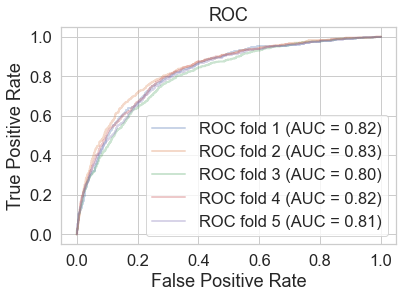

('The average validation AUC for the GaussianNB model is 0.82',
 'The average train AUC for the GaussianNB model is 0.82')

In [55]:
KFold_func(5, final_train_data, lable_only,clf_GNB)

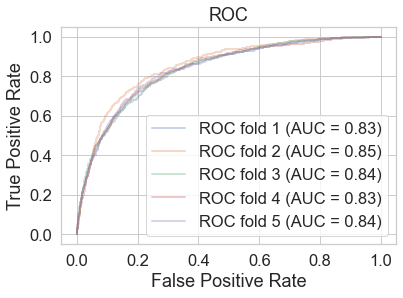

('The average validation AUC for the KNeighborsClassifier model is 0.84',
 'The average train AUC for the KNeighborsClassifier model is 1.0')

In [56]:
KFold_func(5, final_train_data, lable_only,clf_Knn)

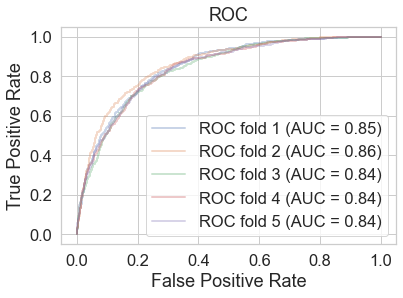

('The average validation AUC for the MLPClassifier model is 0.85',
 'The average train AUC for the MLPClassifier model is 0.85')

In [57]:
KFold_func(5, final_train_data, lable_only,clf_NN)

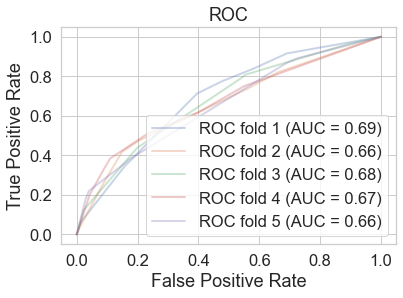

('The average validation AUC for the DecisionTreeClassifier model is 0.67',
 'The average train AUC for the DecisionTreeClassifier model is 0.71')

In [60]:
KFold_func(5, final_train_data, lable_only,clf_DT)

Now we will show Confusion Matrix to the Gaussian Naive Bayes model

In [72]:
def confusion_mat(x, y):
    x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.33, random_state = 42)
    clf = GaussianNB(priors = None) 
    clf.fit(x_train, y_train)
    y_predicted = clf.predict(x_validation)
    cm = confusion_matrix(y_validation, y_predicted)
    TN, FP, FN, TP = cm.ravel()
    confusion_mat = np.array([[TP, FP],[FN, TN]])
    return TN, FP, FN, TP, confusion_mat

In [73]:
TN, FP, FN, TP, con_mat = confusion_mat(final_train_data, lable_only)
print(con_mat)

[[ 317  198]
 [ 767 5081]]


In [68]:
#confusion_mat_fig = plt.figure(7)
#plt.figure(figsize = (5,3)) 
#sns.heatmap(con_mat,annot=True)
#confusion_mat_fig.show()

Our best model according to the AUC is the ANN model (MLP)!

Now, we check the Performance difference between the train set and the validation set of all the models, and check Overfitting

In [78]:
for i in aucs_valid:
    different = aucs_train[i] - aucs_valid[i]
    if different > 0.07:
        print("The " + str(i).split("(")[0] + " model is overfitting")

The KNeighborsClassifier model is overfitting


#  Part E - Prediction

Now , we prepare the test set

In [684]:
test = pd.read_csv('test_without_target.csv')

In [685]:
test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,0,1.0,a,-1d,4.385878,5.0,7.231414,D,70.0,0,...,146.606083,n,1.0,118.0,0.0,D,4.284457,a7,NaN,33.679747
1,1,1.0,unknown,-1d,1.235237,2486.0,4.979543,D,290.0,1,...,461.061120,n,2.0,733.0,0.0,S,2.664354,a5,NaN,36.426381
2,2,1.0,a,90d,3.367264,205.0,7.118272,F,40.0,0,...,274.415273,n,2.0,NaN,0.0,M,3.948146,a5,B,5.375061
3,3,1.0,a,112d,-3.398645,2273.0,6.986870,D,180.0,1,...,76.330357,n,1.0,NaN,0.0,M,3.743150,a11,A,14.739503
4,4,6.0,a,-1d,1.358163,2300.0,6.305195,B,80.0,0,...,41.221638,n,2.0,160.0,0.0,S,3.674207,a8,NaN,-2.064077


In [686]:
test = test.drop('Unnamed: 0',axis=1)

In [687]:
test = unreadable_values(test)

In [688]:
test=drop_un_relevant_columns(test)

In [689]:
test = scailing_X(test)

In [690]:
test = fill_average_info(test)

In [691]:
test = fill_in_common_values(test)

In [692]:
test = binary_columns_transform(test)

In [693]:
test = multi_varient_columns(test)

In [694]:
test , count = Pca_df(test)

In [695]:
test = pd.DataFrame(test)

In [717]:
print(clf_DT)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=7, min_impurity_decrease=1e-10)


In [744]:
print(clf_Knn)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=150,
                     weights='distance')


In [757]:
# predict the test values by using the NN model 
y_predicted_proba = clf_NN.predict_proba(test)
y_predicted = clf_NN.predict(test)
# convert to dataframe and export to csv file
#y_predicted_proba = y_predicted_proba[:,1]
y_predicted = pd.DataFrame(y_predicted_proba,y_predicted,columns=['lable','pred_proba'])
y_predicted.to_csv('submission_group_23.csv')

#  Appendix - Grid Search

In [ ]:
'''###
# KNearestNeighbour:
parametersOptions = {'n_neighbors' : [13, 5, 150], 
                      'weights' : ["uniform", "distance"], 
                      'metric' : ["euclidean", "minkowski"]}
GS = GridSearchCV(neighbors.KNeighborsClassifier(), parametersOptions, cv=3, scoring='roc_auc')
GS.fit(final_train_data, new_lable_only)
print ('K Nearest Neighbour chosen parameters (recieved best AUC): {}'.format(GS.best_params_))


# DecisionTree:
parametersOptions = {'criterion' : ["gini", "entropy"],
                      'max_depth' : [(5), (6)],
                      'min_samples_split' : [(1.0), (2)],
                      'max_features' : ["sqrt", "log2", "auto"],
                      'min_impurity_decrease' : [(0), (1e-7), (1e-10)]} 
GS = GridSearchCV(DecisionTreeClassifier(), parametersOptions, cv=3, scoring='roc_auc')
GS.fit(final_train_data, new_lable_only)
print ('Decision Tree chosen parameters (recieved best AUC): {}'.format(GS.best_params_))


# ANN:
parametersOptions = {'activation' : ["logistic", "relu"], 
                     'hidden_layer_sizes' : [(100,), (50, 50), (20, 20, 10, 10, 10)],
                     'batch_size' : [10, 50],
                     'learning_rate_init' : ["constant"], #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum
                     'max_iter' : [1500]} 
GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=3, scoring='roc_auc')
GS.fit(final_train_data, new_lable_only)
print ('Neural Network chosen parameters (recieved best AUC): {}'.format(GS.best_params_))

###
'''